## California Wildfires Over Time
##### In this notebook, we will be demonstrating a visual analysis of fire frequency over time. Fire data obtained from CALFIRE will be divided into decade categories and mapped on to seperate subplots of California. This is paired with out qualitative analysis of the worsening impacts of climate change over the last 6 decades.

#### We will first import the required libraries for data manipulation, visualization, and map rendering.

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

##### We now have the libraries available for use. No import errors as expected.

##### Next, we will load the GeoJSON data for the state boundary and fire perimeters, convert the YEAR_ column to a numeric type, and extract the decade from the fire start year. Additionally, we will clip the fire perimeters to the state boundary.

In [16]:
# Load the GeoJSON data for the state boundary
state_path = "/Users/matthewaijala/wildfires_over_time/castateboundary_reprojected.geojson"
state_boundary = gpd.read_file(state_path)

# Load the GeoJSON data for the fire perimeters
fire_path = "/Users/matthewaijala/wildfires_over_time/California_Fire_Perimeters_(all)_reprojected.geojson"
fires = gpd.read_file(fire_path)

# Convert YEAR_ column to numeric type
fires['YEAR_'] = pd.to_numeric(fires['YEAR_'], errors='coerce')

# Extract the decade from the fire start year
fires['decade'] = (fires['YEAR_'] // 10) * 10

# Clip the fire perimeters to the state boundary
fires = gpd.clip(fires, state_boundary)

#### We now have the pertinent data from our geojson available for our use. We have seperated all fires into decade categories for later plotting.

#### Next, we will define a dictionary that maps each decade to a color for the fire perimeters and set the color for the terrain tiles. We will also define the title font properties for the subplots.

In [17]:
# Define a dictionary that maps each decade to a color
decade_colors = {
    1960: 'red',
    1970: 'orange',
    1980: 'yellow',
    1990: 'green',
    2000: 'blue',
    2010: 'purple'
}

# Define the color for the terrain tiles
terrain_color = 'gray'

# Define the title font properties
title_font_size = 20
title_font = {'family': 'serif', 'weight': 'bold', 'size': title_font_size}

#### The style for each decade is established.

##### Next, we will create a grid of subplots for each decade. For each decade, we will filter the fires, add the state boundary, fire perimeters, and terrain tiles to the map, and set the title with custom font properties.

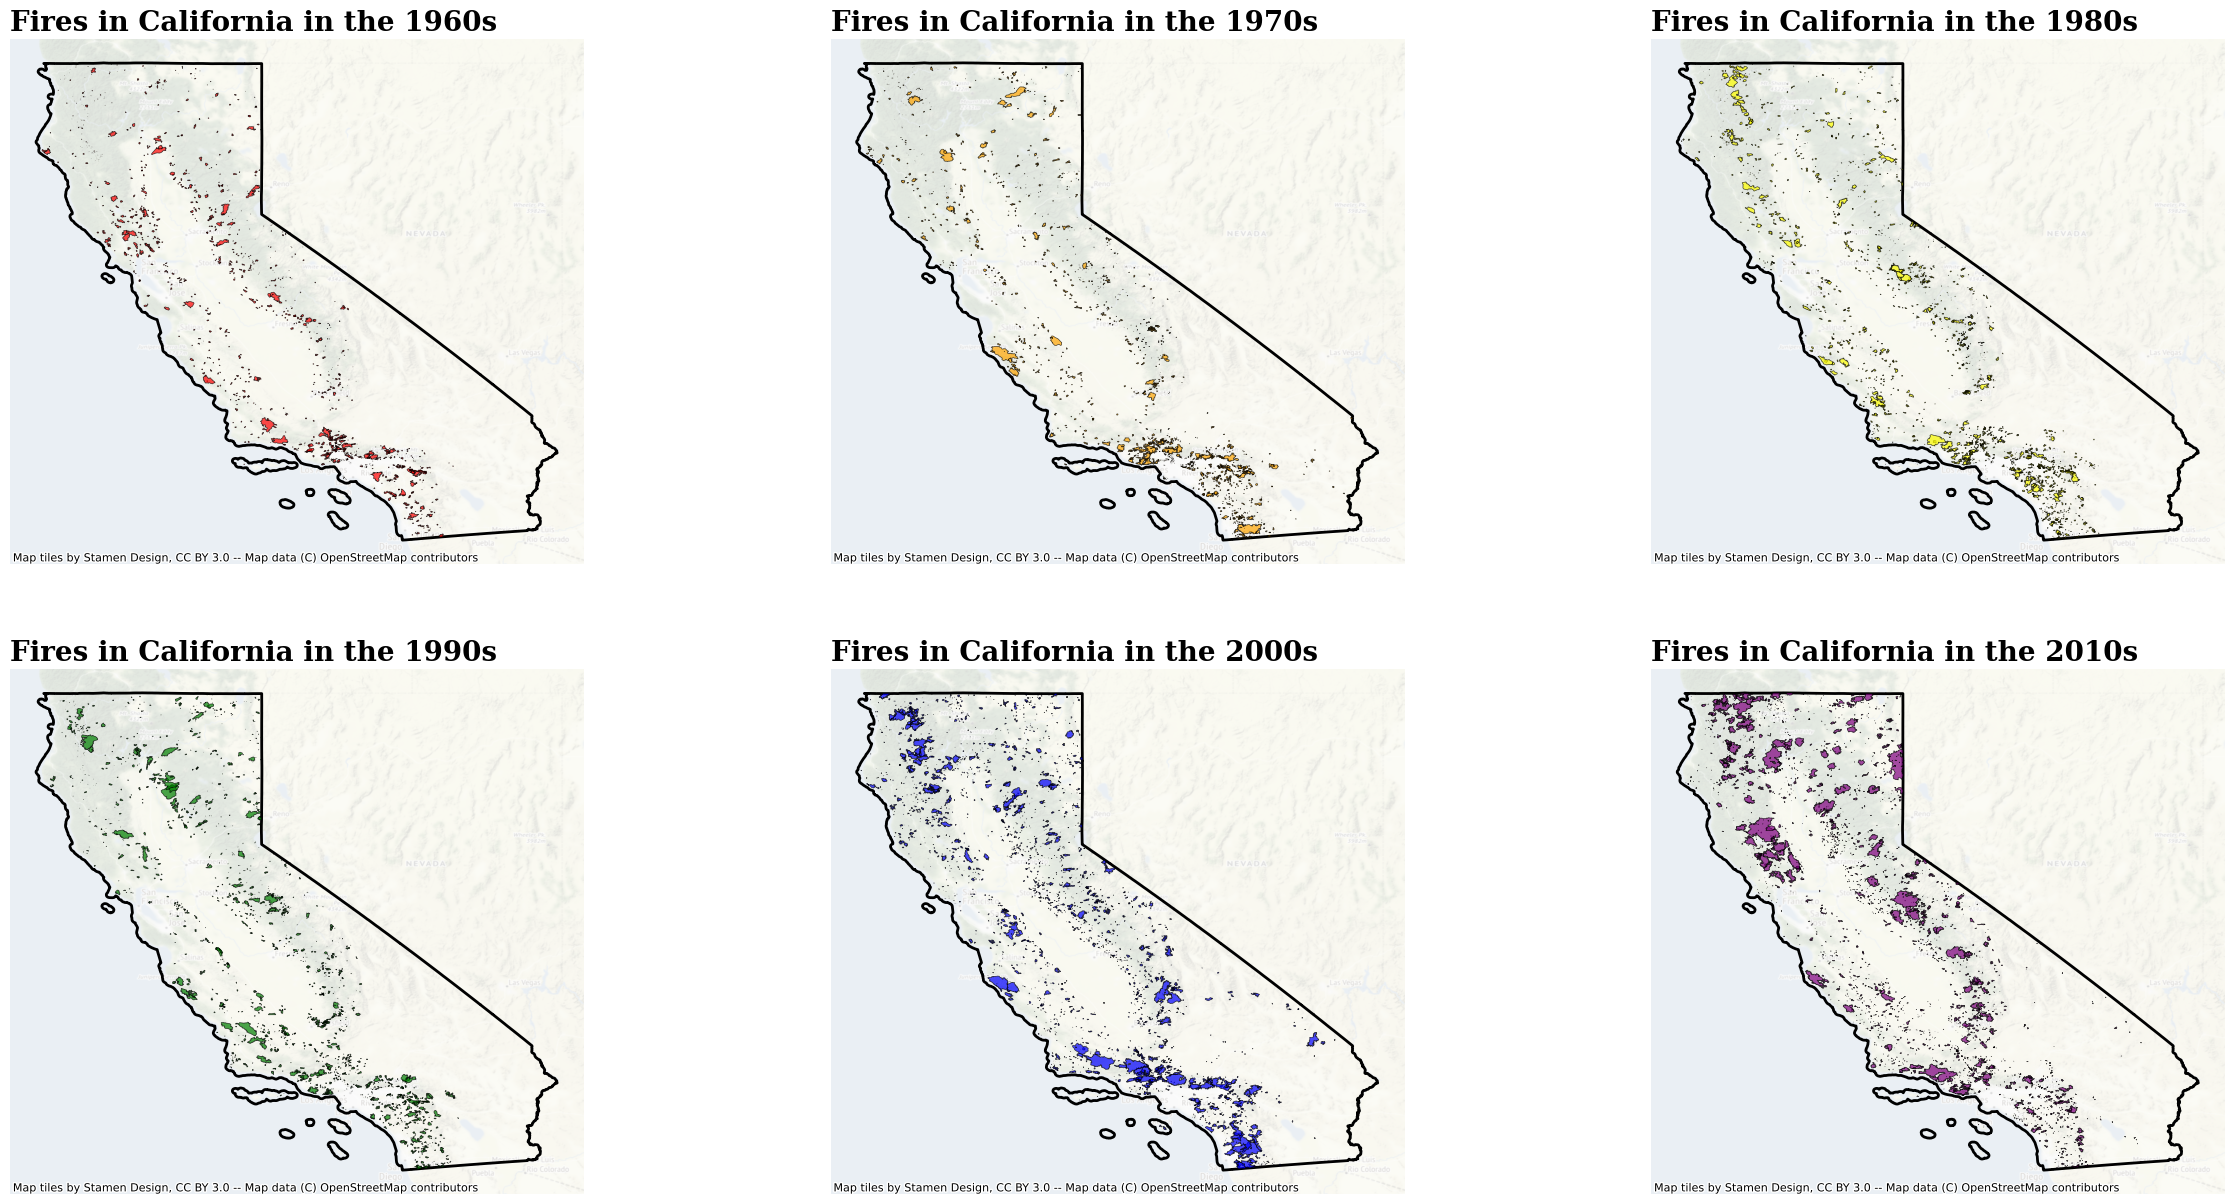

In [18]:
# Create a grid of subplots for each decade
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
axes = axes.flatten()

# Iterate over each decade and create a map in the corresponding subplot
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    # Filter the fires for the current decade
    decade_fires = fires[fires['decade'] == decade]

    # Add the state boundary to the map
    state_boundary.plot(ax=axes[i], facecolor='none', edgecolor='black', linewidth=2)

    # Add the fire perimeters to the map
    decade_fires.plot(ax=axes[i], color=decade_colors[decade], alpha=0.7, linewidth=0.5, edgecolor='k', legend=False)

    # Add the terrain tiles to the map
    ctx.add_basemap(ax=axes[i], crs=state_boundary.crs.to_string(), source=ctx.providers.Stamen.Terrain, alpha=0.2, cmap=terrain_color)

    # Set the title with the custom font properties
    axes[i].set_title(f"Fires in California in the {decade}s", fontdict=title_font, loc='left')
    axes[i].set_axis_off()

#### Now that each subplot has been styalistically edited as necessary, we just need to display them.

#### Finally, we will adjust the spacing of the subplots and display them.

In [19]:
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.01, hspace=0.1)

plt.show()


<Figure size 640x480 with 0 Axes>

#### As expected, we can see the fires for each decade in california.